Amirreza Soleimanbeigi 98109837


 <div dir="rtl">ماتریس کواریانس مجموعه داده ها در هر درایه i و j  ضرب داخلی سطر های i و j است که همه درایه ها تقسیم بر تعداد ستون های ماتریس X_abro منهای ۱ است و u_1 * sigma_1 * v_1T + u_2 * sigma_2 * v_2T + ... است

<div dir="rtl"> ادعا به این دلیل درست است که ماتریس U دارای پایه های فضای ستونی است و چون ماتریس متقارن است ماتریس V نیز همان ماتریس U است

<div dir="rtl"> چون ماتریس سیگما به ترتیب بزرگ بودن به کوچک بودن singular value ها است پس برای تبدیل بعد می توان ستون های ۱ تا L ماتریس U را در نظر گرفت و ترانهاده آن را به عنوان ماتریس تبدیل در نظر گرفت

Saving Iris.csv to Iris (34).csv


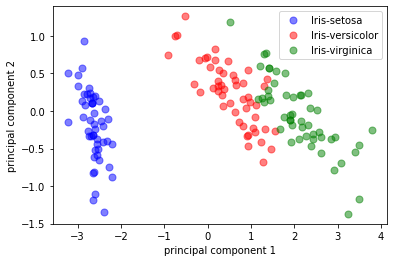

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io 
from google.colab import files 

uploaded = files.upload() 
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv'])) 
dataframe = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X = dataframe.to_numpy()
X = X.T
n = 150
m = 4
mean_X = np.zeros((m,1))
for i in range(n):
  mean_X = mean_X + X[:,i].reshape(m,1)
mean_X = mean_X.reshape(m,1) / n
X_bar = np.hstack((mean_X,mean_X))
for i in range(n - 2):
  X_bar = np.hstack((X_bar,mean_X))
X_abro = X - X_bar
S = np.matmul(X_abro,X_abro.T) / (n - 1)
u, sigma, v = np.linalg.svd(S, full_matrices=True)
W = u[:,0:2].T
X_prime = np.matmul(W,X_abro).T
X_prime[:,0] = X_prime[:,0] * -1
plt.plot(X_prime[0:50,0], X_prime[0:50,1], 'o', markersize = 7, color = 'blue', alpha = 0.5, label = 'Iris-setosa')
plt.plot(X_prime[50:100,0], X_prime[50:100,1], 'o', markersize = 7, color = 'red', alpha = 0.5, label = 'Iris-versicolor')
plt.plot(X_prime[100:150,0], X_prime[100:150,1], 'o', markersize = 7, color = 'green', alpha = 0.5, label = 'Iris-virginica')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()

<div dir="rtl"> این کد ابتدا میانگین مقدار یک ویژگی را روی کل داده ها میگیرد سپس آن را از ماتریس کل کم می کند و سپس ماتریس کواریانس آن را حساب میکند و در حساب کردن ماتریس کوارینس ماتریس را در ترانهاده آن ضرب و تقسیم بر تعداد ستون های آن منهای یک میکند سپس از svd ماتریس کواریانس ماتریس U را حساب می کند و دو ستون اول آن را نگه میدارد و ترانهاده آن را در ماتریس داده ها که از میانگین کم شده ضرب میکند تا تبدیل را انجام دهد و سپس نمودار را رسم می کند.